In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch


In [2]:
# Load the dataset
df = pd.read_csv('../data/student-performance.csv')

# Display the first few rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Histograms
Purpose: Visualize the frequency distribution of exam scores.

**Syntax**
```py
plt.hist(dataframe, bins=total_intervals, color=color, edgecolor=color)
```

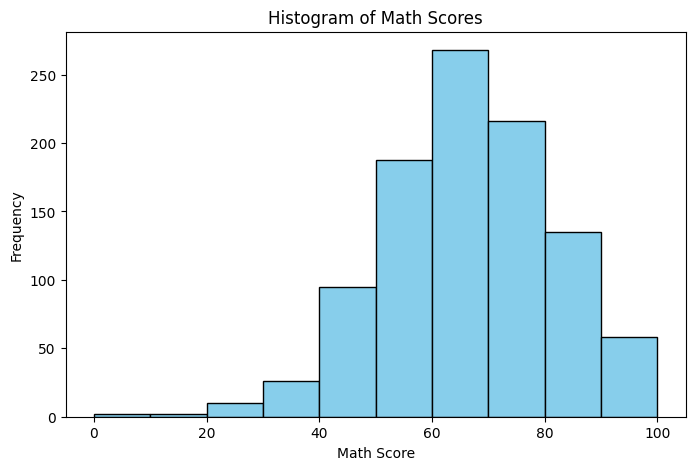

In [3]:
plt.figure(figsize=(8, 5))
plt.hist(df['math score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

### Normalized Histogram

Pass `density=True` to get relative frequency instead of frequency count

```py
plt.hist(dataframe, bins=total_intervals, density=True, color=color, edgecolor=color)
```


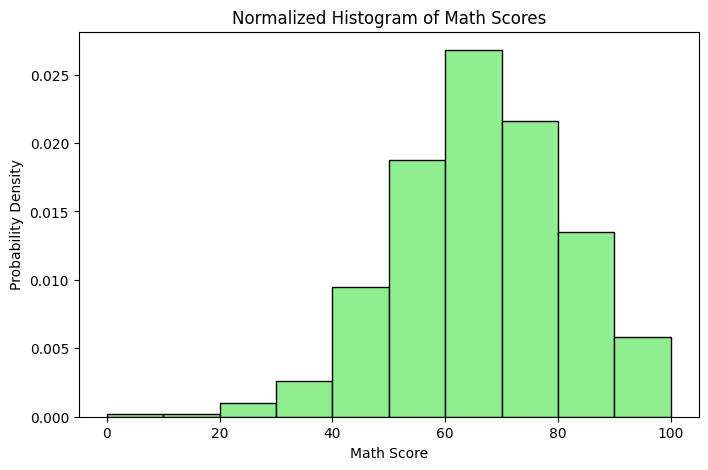

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(df['math score'], bins=10, density=True, color='lightgreen', edgecolor='black')
plt.title('Normalized Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Probability Density')
plt.show()

## Cumulative Histogram

Pass `cumulative=True` to get relative frequency instead of frequency count

```py
plt.hist(dataframe, bins=total_intervals, cumulative=True, color=color, edgecolor=color)
```


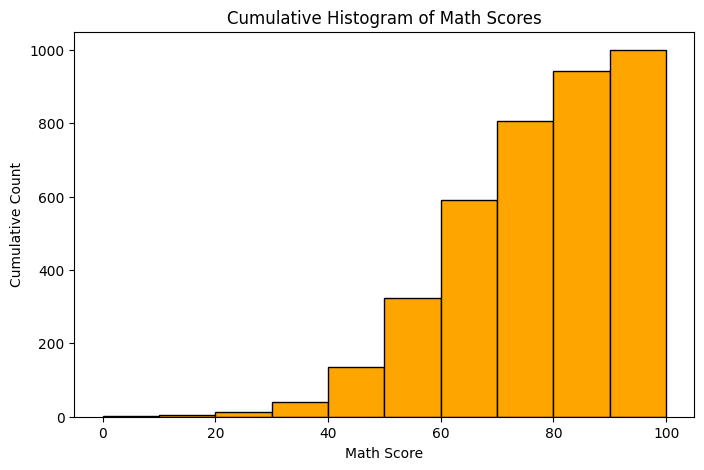

In [5]:
# Cumulative histogram
plt.figure(figsize=(8, 5))
plt.hist(df['math score'], bins=10, cumulative=True, color='orange', edgecolor='black')
plt.title('Cumulative Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Cumulative Count')
plt.show()

## Density Plot
Histogram doesn't support KDE directly, We will use seaborn for it
Same as Normalized Histogram, but the curve is smooth, data is continuous

**Syntax**

```py
sns.kdeplot(dataframe, fill=Boolean, color=color)
```



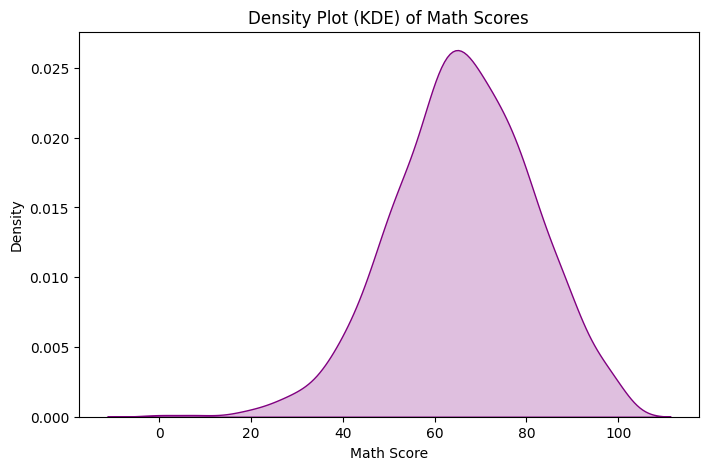

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['math score'], fill=True, color='purple')
plt.title('Density Plot (KDE) of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.show()

# Barchart

## Horizontal Bar Chart
A horizontal bar chart displays categories along the y-axis and their corresponding values on the x-axis. It is especially useful when category labels are long or when comparing fewer items side by side.

**Syntax**
```py
plt.barh(list_of_category, list_of_values, color=color)
```

[np.float64(66.089), np.float64(69.169), np.float64(68.054)]


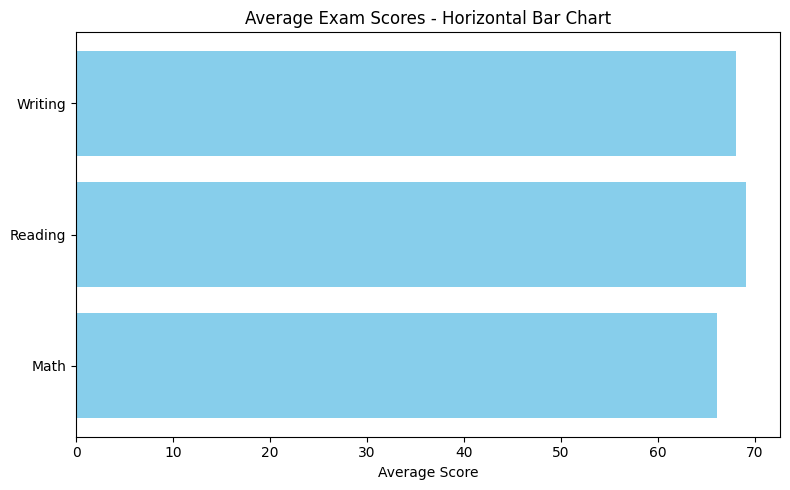

In [7]:
categories = ['Math', 'Reading', 'Writing']
average_scores = [df['math score'].mean(), df['reading score'].mean(), df['writing score'].mean()]

print(average_scores)

plt.figure(figsize=(8, 5))
plt.barh(categories, average_scores, color='skyblue')
plt.xlabel('Average Score')
plt.title('Average Exam Scores - Horizontal Bar Chart')
plt.tight_layout()
plt.show()

## Vertical Bar Chart
A vertical bar chart is the most common form of bar chart. It represents data with rectangular bars where the height is proportional to the value it represents. Categories are shown on the x-axis and values on the y-axis.

**Syntax**
```py
plt.bar(list_of_category, list_of_values, color=color)
```

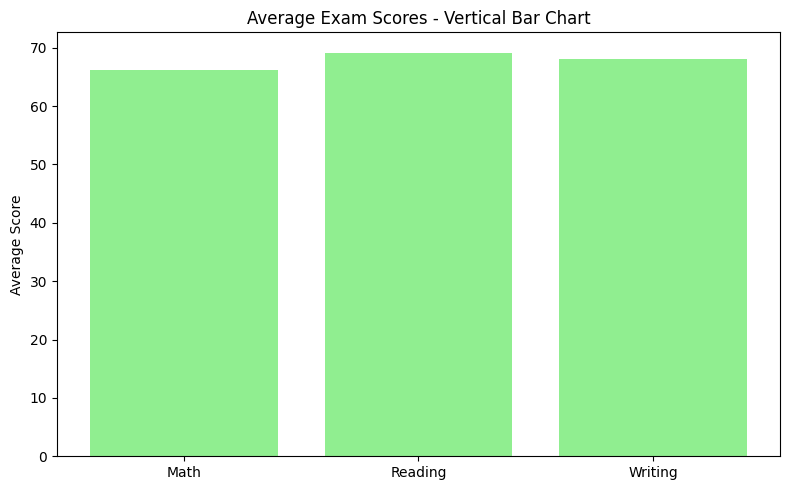

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(categories, average_scores, color='lightgreen')
plt.ylabel('Average Score')
plt.title('Average Exam Scores - Vertical Bar Chart')
plt.tight_layout()
plt.show()

## Stacked Bar Chart
A stacked bar chart shows the total size of different groups and the contribution of each sub-group. Each bar is divided into segments representing sub-categories, stacked one above the other.

**Syntax**
Use multiple vertical bars with bottom parameter (starting y position)
```py
plt.bar(list_of_categories, list_of_values_1, label=label, color=color)
plt.bar(list_of_categories, list_of_values_2, bottom=list_of_values_1, label=label, color=color) # bottom=list_of_values_1 means start this chart where list_of_values_1 ends
```

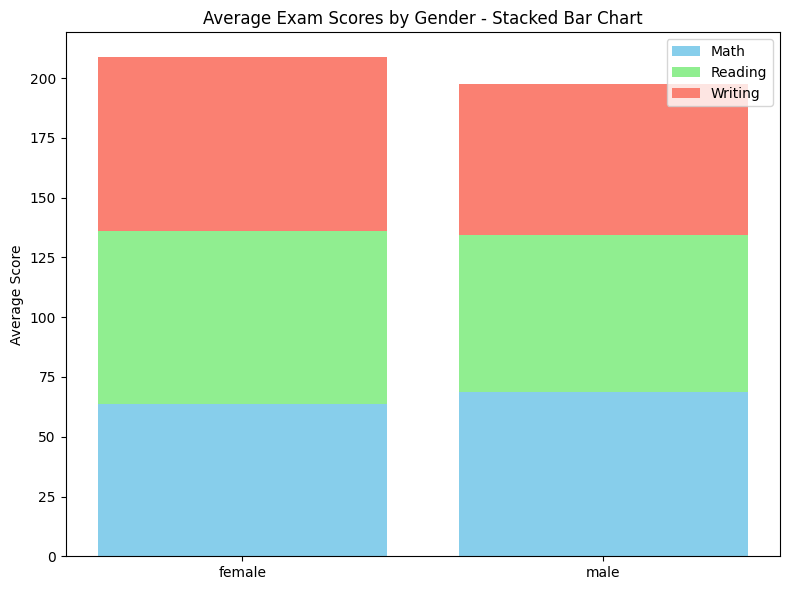

In [9]:
# Example using gender breakdown for each subject
scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

genders = scores_by_gender.index
math = scores_by_gender['math score']
reading = scores_by_gender['reading score']
writing = scores_by_gender['writing score']

plt.figure(figsize=(8, 6))
plt.bar(genders, math, label='Math', color='skyblue')
plt.bar(genders, reading, bottom=math, label='Reading', color='lightgreen')
plt.bar(genders, writing, bottom=math+reading, label='Writing', color='salmon')
plt.ylabel('Average Score')
plt.title('Average Exam Scores by Gender - Stacked Bar Chart')
plt.legend()
plt.tight_layout()
plt.show()

## Grouped Bar Chart
Grouped (or clustered) bar charts display bars grouped by category. Each group contains multiple bars side by side, representing subcategories. It is useful for comparing multiple variables across the same category.

**Syntax**
Use multiple vertical bars with bottom parameter (starting y position)
```py
plt.bar(x_position, list_of_categories, list_of_values_1, label=label, color=color) # x position determines where the bar is
```

[0 1]


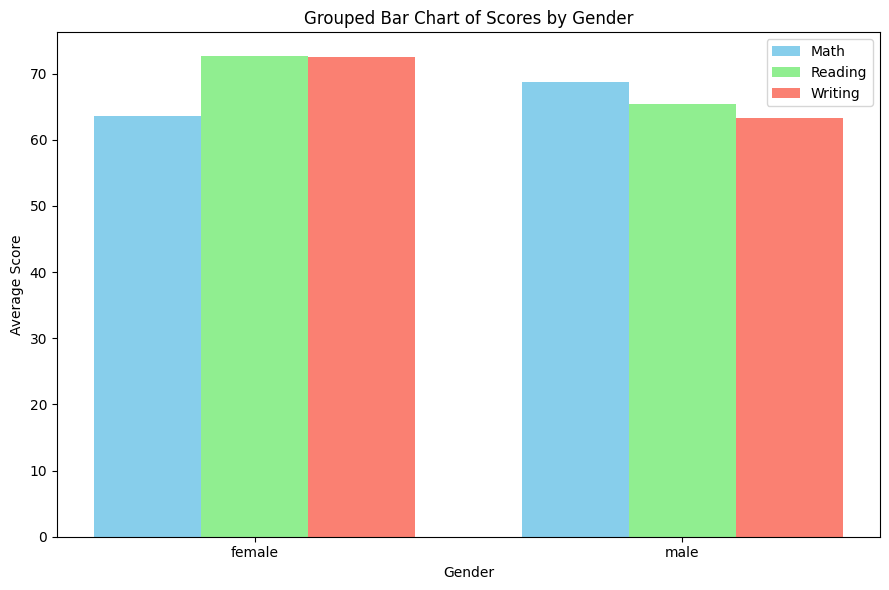

In [10]:
x = np.arange(len(genders))  # gender categories
width = 0.25

print(x) # [0.1] are x positions: (0 is female and 1 is male)

plt.figure(figsize=(9, 6))
plt.bar(x - width, math, width, label='Math', color='skyblue') # x - width means [0 - 0.25, 1 - 0.25] = [-0.25, 0.75] -> math bar will be centered from -0.25 - 0.75 
plt.bar(x, reading, width, label='Reading', color='lightgreen') # x means [0, 1] = [0, 1] -> reading bar will be centered from 0 - 1
plt.bar(x + width, writing, width, label='Writing', color='salmon') # x + width means [0 + 0.25, 1 + 0.25] = [0.25, 1.25] -> writing bar will be centered from 0.25 - 1.25

plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Grouped Bar Chart of Scores by Gender')
plt.xticks(x, genders)
plt.legend()
plt.tight_layout()
plt.show()

## Lollipop Chart
A lollipop chart is a variation of the bar chart that uses a line and a dot instead of a solid bar. It reduces visual clutter while still emphasizing the magnitude of the data values. Often used when you want a cleaner look.

**Syntax**
Use vline with plot at same position
```py
plt.vlines(x=categories, ymin=0, ymax=list_of_values, color=color, linewidth=number)
plt.scatter(categories, list_of_values, color=color, s=size_of_dot)
```

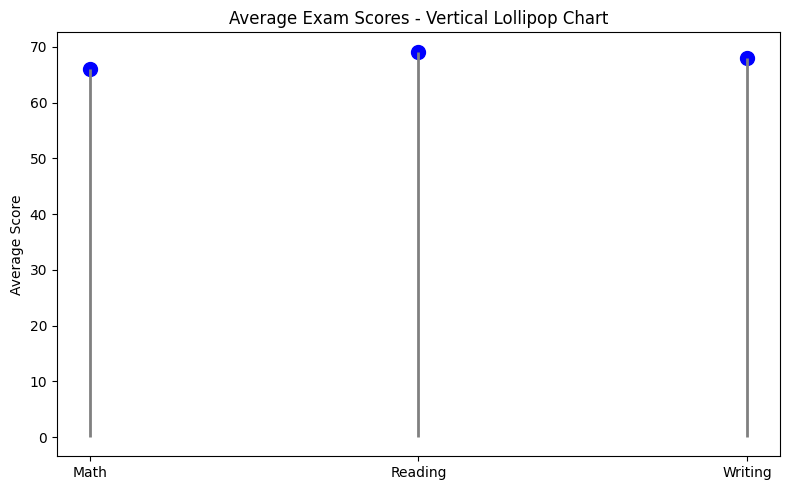

In [11]:
categories = ['Math', 'Reading', 'Writing']
average_scores = [df['math score'].mean(), df['reading score'].mean(), df['writing score'].mean()]

plt.figure(figsize=(8, 5))
plt.vlines(x=categories, ymin=0, ymax=average_scores, color='gray', linewidth=2)
plt.scatter(categories, average_scores, color='blue', s=100)
plt.ylabel('Average Score')
plt.title('Average Exam Scores - Vertical Lollipop Chart')
plt.tight_layout()
plt.show()


# Pie Chart

In [12]:
lunch_counts = df['lunch'].value_counts()
labels = lunch_counts.index
sizes = lunch_counts.values

print("lunch_counts")
print(lunch_counts)
print("\nlabels")
print(labels)
print("\nsizes")
print(sizes)

lunch_counts
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

labels
Index(['standard', 'free/reduced'], dtype='object', name='lunch')

sizes
[645 355]


# Standard Pie Chart

A standard pie chart represents categorical data as slices of a circle. Each slice shows the proportion of each category relative to the whole. It's best used for small datasets with clear part-to-whole relationships.

**Syntax (Matplotlib):**
```py
plt.pie(values, labels=labels, autopct='%1.1f%%')
```
`autopct` is a parameter in `matplotlib.pyplot.pie()` that displays the percentage value inside or near each slice of the pie chart.

| Component   | Meaning                                                                 |
|-------------|-------------------------------------------------------------------------|
| `%`         | Indicates the start of a format specification                          |
| `1`         | Minimum number of characters before the decimal point (optional)       |
| `.1`        | Number of digits to display **after** the decimal point (precision = 1)|
| `f`         | Format type: **floating-point number**                                 |
| `%%`        | Escapes the `%` symbol to display a literal percent sign in the output |



([<matplotlib.patches.Wedge at 0x266daf0e710>,
 [Text(0.33991865722907993, 1.0461621798113232, 'A'),
  Text(-0.3399188151951704, -1.046162128485022, 'B')],
 [Text(0.18541017667040724, 0.5706339162607217, '40.0%'),
  Text(-0.1854102628337293, -0.5706338882645574, '60.0%')])

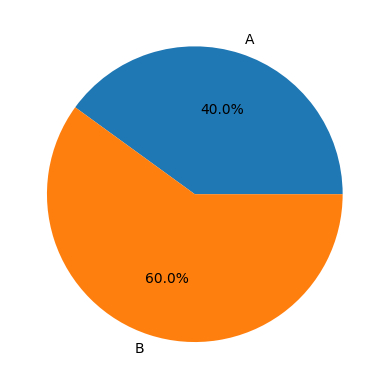

In [13]:
# Autopct example
plt.pie([40, 60], labels=['A', 'B'], autopct='%1.1f%%')

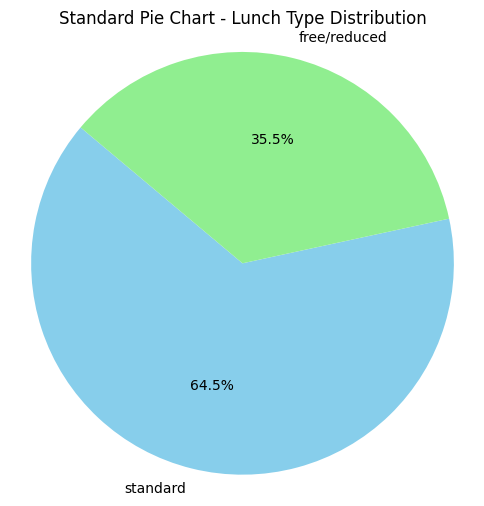

In [14]:

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Standard Pie Chart - Lunch Type Distribution')
plt.axis('equal')
plt.show()

## Donut Chart
A donut chart is a variation of the pie chart with a blank center. It reduces clutter and provides space for labels or values in the middle.

**Syntax (Matplotlib):**
Add a `plt.Circle()` at the center after drawing the pie.

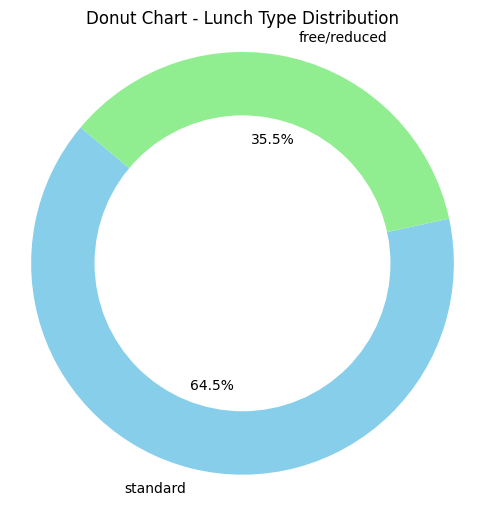

In [15]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])


# Draw center circle to create donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Donut Chart - Lunch Type Distribution')
plt.axis('equal')
plt.show()

## Exploded Pie Chart
An exploded pie chart emphasizes one or more slices by "pulling" them out from the rest of the pie. Useful to highlight important categories.

**Syntax (Matplotlib):**
Use the `explode` parameter to separate slices.


[0.1, 0]


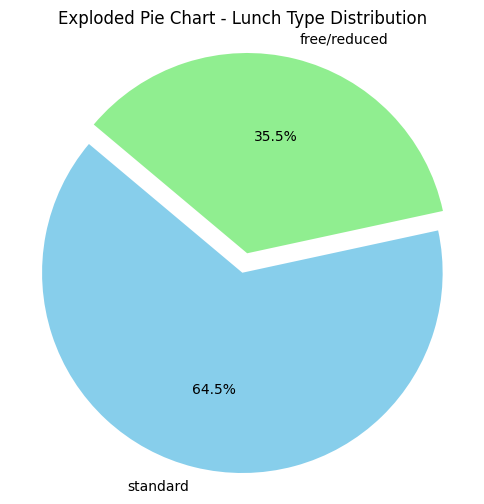

In [16]:
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]

print(explode) # [0.1, 0]

'''
A list is created called explode that tells Matplotlib how far to "push out" eac slice from the center.
Here, only the first slice (index 0) is exploded by 0.1 units (on a scale from 0 to 1).
All other slices are set to 0 — meaning they stay in place.
'''


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Exploded Pie Chart - Lunch Type Distribution')
plt.axis('equal')
plt.show()


# Nested Pie Chart (Sunburst)
A nested pie chart (sunburst) is used to show hierarchical data. The inner circle represents top-level categories, and the outer circle represents sub-categories.

**Syntax (Matplotlib):**
Use two `plt.pie()` calls with `radius` and `width` adjustments.


Are students from lower-income families (free/reduced lunch) less likely to complete test preparation?

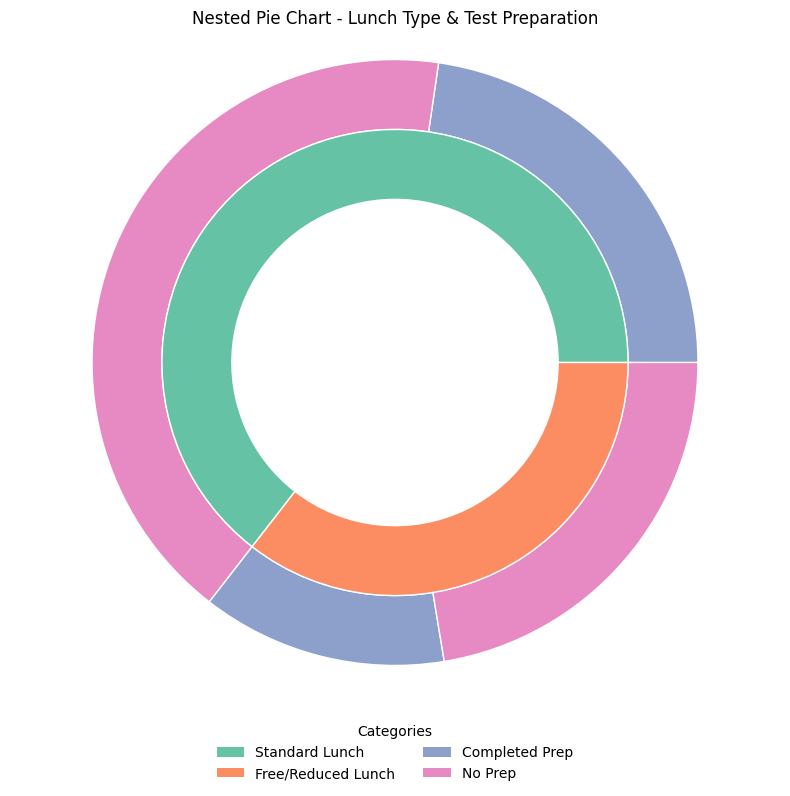

In [17]:
# Inner ring: lunch type
inner_labels = df['lunch'].value_counts().index.tolist()
inner_sizes = df['lunch'].value_counts().values.tolist()
inner_colors = ['#66c2a5', '#fc8d62']  # custom colors for clarity

# Outer ring: test preparation course by lunch type
outer_labels = []
outer_sizes = []
outer_colors = []

prep_colors = {
    'completed': '#8da0cb',
    'none': '#e78ac3'
}

for lunch in inner_labels:
    prep_counts = df[df['lunch'] == lunch]['test preparation course'].value_counts()
    for prep in ['completed', 'none']:
        count = prep_counts.get(prep, 0)
        outer_labels.append(f'{lunch} - {prep}')
        outer_sizes.append(count)
        outer_colors.append(prep_colors[prep])

# Plot the nested donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Outer ring
ax.pie(outer_sizes,
       radius=1.3,
       labels=None,
       colors=outer_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'))

# Inner ring
ax.pie(inner_sizes,
       radius=1,
       labels=None,
       colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'),
       labeldistance=0.7)

# Legend
legend_elements = [
    Patch(facecolor='#66c2a5', label='Standard Lunch'),
    Patch(facecolor='#fc8d62', label='Free/Reduced Lunch'),
    Patch(facecolor='#8da0cb', label='Completed Prep'),
    Patch(facecolor='#e78ac3', label='No Prep')
]

plt.legend(handles=legend_elements,
           title='Categories',
           loc='lower center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=False)

plt.title('Nested Pie Chart - Lunch Type & Test Preparation')
plt.axis('equal')
plt.tight_layout()
plt.show()


The chart allows for a **side-by-side visual comparison** of test preparation rates across the two socioeconomic groups.

- In the **standard lunch** group:
  - A larger proportion of students **completed** test preparation compared to those who did not.
  
- In the **free/reduced lunch** group:
  - The majority of students **did not complete** test preparation.
  - Only a smaller slice represents students who **completed** it.

This suggests a **clear disparity** in access or participation in test preparation between the two groups.


# Box Plot

## Normal Box Plot
A standard box plot summarizes the distribution of a continuous variable using five statistics:
- Minimum
- First quartile (Q1)
- Median (Q2)
- Third quartile (Q3)
- Maximum

It also identifies outliers using whiskers and dots. This is useful for detecting the spread, skewness, and outliers in the data.

**Syntax (Matplotlib):**
`plt.boxplot(data)`

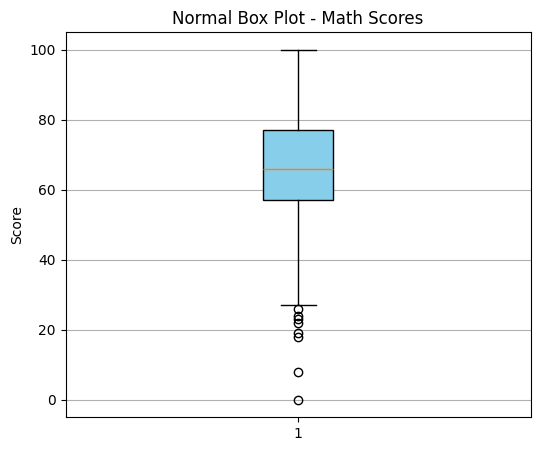

In [18]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['math score'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Normal Box Plot - Math Scores')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

### Analysis: Normal Box Plot

The box plot of math scores shows the **median performance**, the **interquartile range**, and any potential **outliers**. This plot quickly highlights whether the data is **symmetrical or skewed**, and how **widely scores vary**. For example, a long upper whisker may suggest high-performing outliers.

## Notched Box Plot

A notched box plot includes a "notch" around the median, representing the **confidence interval** of the median (usually 95%).

If the notches of two boxes do not overlap, their medians are significantly different.

**Syntax (Matplotlib):**
`plt.boxplot(data, notch=True)`


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_4876\2057734153.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


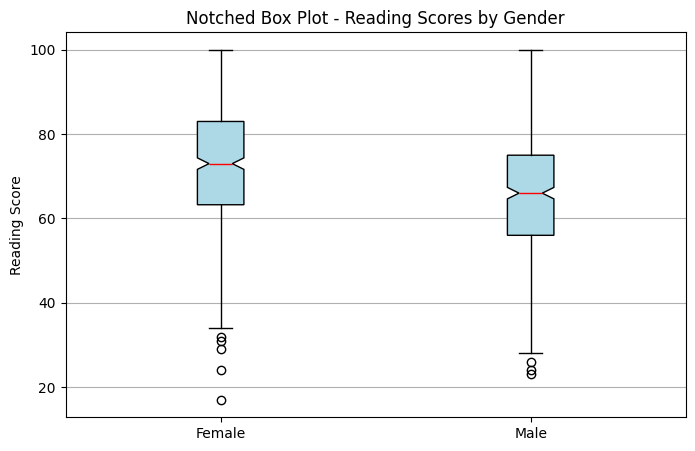

In [19]:
# Prepare data
female_scores = df[df['gender'] == 'female']['reading score']
male_scores = df[df['gender'] == 'male']['reading score']

# Create box plot
plt.figure(figsize=(8, 5))
plt.boxplot(
    [female_scores, male_scores],
    labels=['Female', 'Male'],
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='red'),
)

plt.title('Notched Box Plot - Reading Scores by Gender')
plt.ylabel('Reading Score')
plt.grid(axis='y')
plt.show()


### Analysis: Notched Box Plot

This notched box plot compares the reading scores of male and female students.

- The **median** score is shown with a horizontal line inside each box.
- The **notch** shows where the "true" median is likely to fall.

If the **notches do not overlap**, we can say the median scores are likely **statistically different**.

Because the notches in the box plot for male and female students are separated, we can reasonably interpret that:

The median reading scores for male and female students are likely significantly different.



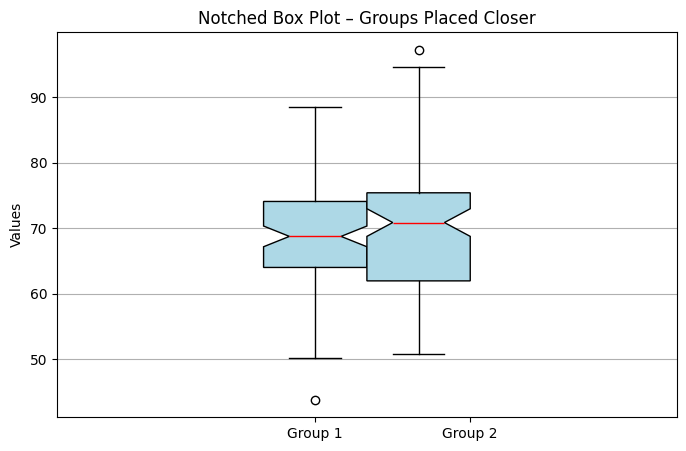

False
{'Min': np.float64(43.80254895910255), 'Q1': np.float64(63.99094329503547), 'Median (Q2)': np.float64(68.73043708220288), 'Q3': np.float64(74.05952052012063), 'Max': np.float64(88.52278184508938)}
{'Min': np.float64(50.812287847009586), 'Q1': np.float64(61.943394768424255), 'Median (Q2)': np.float64(70.84107169946834), 'Q3': np.float64(75.3817044766274), 'Max': np.float64(97.20169166589619)}


In [20]:

def five_number_summary(data, label="Group"):
    return {
        "Min": np.min(data),
        "Q1": np.percentile(data, 25),
        "Median (Q2)": np.median(data),
        "Q3": np.percentile(data, 75),
        "Max": np.max(data)
    }


# Generate two similar groups
np.random.seed(42)
group1 = np.random.normal(loc=70, scale=10, size=100)
group2 = np.random.normal(loc=70, scale=10, size=100)



# Plot: boxes at custom positions (e.g., 1.0 and 1.3 instead of 1 and 2)
plt.figure(figsize=(8, 5))
plt.boxplot(
    [group1, group2],
    positions=[1.0, 1.2],  # Move boxes closer
    widths=0.2,
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='red')
)

# Label only once using manual ticks
plt.xticks([1.0, 1.3], ['Group 1', 'Group 2'])
plt.title('Notched Box Plot – Groups Placed Closer')
plt.ylabel('Values')
plt.grid(axis='y')
plt.show()

summary1 = five_number_summary(group1, label="Group 1")
summary2 = five_number_summary(group2, label="Group 2")


print(np.array_equal(group1, group2))
print(summary1)
print(summary2)



Both groups show **very similar distributions**, with slightly different minimum and maximum values, but nearly identical medians and interquartile ranges.

The **notched box plot** shows that the notches (around the medians) for both groups **overlap clearly**, which suggests:
- There is **no statistically significant difference** between the medians.
- The data is **similarly spread** and shaped.

## Violin Plot

A violin plot combines a box plot with a **KDE (Kernel Density Estimate)** curve. It provides both summary statistics and the **distribution shape** of the data.

**Syntax (Seaborn):**
`sns.violinplot(y=data)`

Use when you want to see both the **summary** and **probability distribution**.


## KDE
Kernel Density Estimate (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. In simpler terms, it helps you understand the distribution of data — i.e., where data points are concentrated — without assuming a specific underlying distribution like normal or uniform.

KDE works by placing a kernel (a smooth, symmetric function, usually a Gaussian bell curve) on each data point, then summing them up to create a smooth curve.

**Example**
Imagine plotting a histogram of data, but instead of using fixed-width bars, you use a smooth bump over each point — KDE is essentially that.



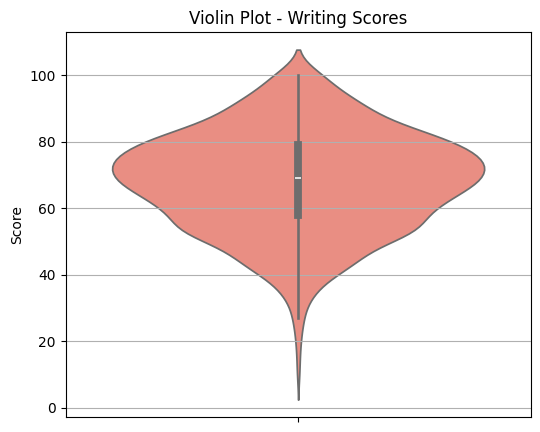

In [21]:
plt.figure(figsize=(6, 5))
sns.violinplot(y=df['writing score'], inner='box', color='salmon')
plt.title('Violin Plot - Writing Scores')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

### Analysis: Violin Plot

The violin plot of writing scores shows the **distribution shape** and **summary statistics** together. Wider parts of the violin indicate where scores are more concentrated. Compared to a box plot, it gives **richer insights** into the **frequency and modality** of score distribution (e.g., if the data is bimodal or skewed).

→ Most students scored between **60 and 80** on the writing test.


## Side-by-Side Box Plot

Side-by-side box plots compare distributions across different categories (e.g., gender, lunch type).

They are useful for quickly assessing **differences in medians, spread, and outliers** between groups.

**Syntax (Seaborn):**
`sns.boxplot(x='category', y='value', data=df)`


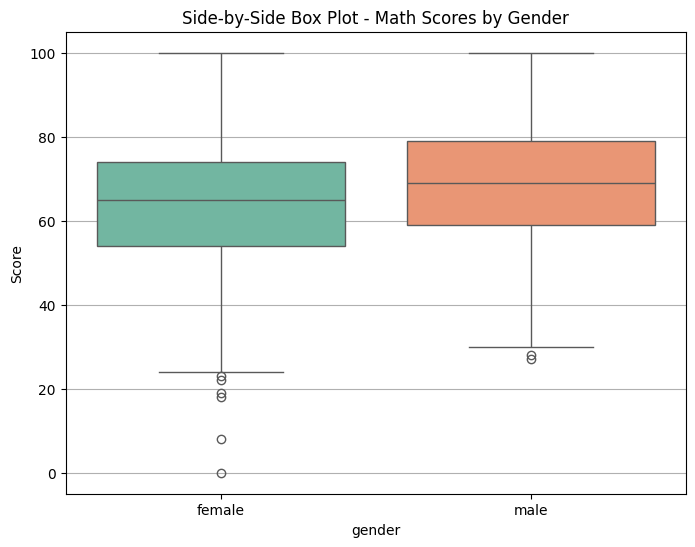

Median Math Score - Male: 69.0
Median Math Score - Female: 65.0


In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', hue='gender', y='math score', data=df, palette='Set2')
plt.title('Side-by-Side Box Plot - Math Scores by Gender')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

medians = df.groupby('gender')['math score'].median()

# Print the results
print(f"Median Math Score - Male: {medians['male']}")
print(f"Median Math Score - Female: {medians['female']}")



Analysis: Side-by-Side Box Plot

This side-by-side box plot compares math scores across genders. You can visually inspect:
- Whether one group has a **higher median**
- Whether there’s **more variation** in one group
- Presence of **outliers**
---
- Half of **male students** scored **above 69**, and half scored below.
- Half of **female students** scored **above 65**, and half scored below.
- So, on average, male students scored slightly higher in math than female students in this dataset.




